In [1]:
%load_ext autoreload
%load_ext autotime

time: 182 µs (started: 2023-12-17 23:42:50 -08:00)


In [2]:
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings('ignore')

time: 436 µs (started: 2023-12-17 23:42:50 -08:00)


In [3]:
trace_path = '/usr/workspace/iopp/wisio_logs/recorder_montage_pegasus_32/_parquet'

time: 1.23 ms (started: 2023-12-17 23:42:50 -08:00)


In [4]:
%autoreload 2

from wisio.cluster_management import load_cluster_config
from wisio.recorder import RecorderAnalyzer

cluster_config = load_cluster_config('cluster_config_local.yml')
cluster_config.local_dir = '/var/tmp/wisio_recorder_montage_pegasus_32'

analyzer = RecorderAnalyzer(
    checkpoint=True,
    checkpoint_dir='/usr/workspace/iopp/wisio_logs/_checkpoints/recorder_montage_pegasus_32',
    cluster_config=cluster_config,
    working_dir='.wisio/recorder_montage_pegasus_32',
    debug=False,
    output_type='console',
)

analyzer.cluster_manager.client.dashboard_link

[INFO] [23:42:52] Initializing Recorder analyzer [/g/g91/izzet/projects/wisio/wisio/analyzer.py:96]


'http://127.0.0.1:46653/status'

time: 4.26 s (started: 2023-12-17 23:42:50 -08:00)


In [5]:
%autoreload 2

result = analyzer.analyze_parquet(
    trace_path=trace_path, 
    metrics=['time'],
    # view_types=['proc_name'],
)

[INFO] [23:42:54] Read traces (0.14034730195999146) [/g/g91/izzet/projects/wisio/wisio/recorder.py:67]
[INFO] [23:42:54] Compute high-level metrics (0.052042524330317974) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:124]
[INFO] [23:42:54] Compute main view (0.05028021987527609) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:136]
[INFO] [23:42:55] Compute metric boundaries (0.6657052729278803) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:145]
[INFO] [23:43:00] Compute perspectives (5.18479888420552) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:168]
/g/g91/izzet/projects/wisio/wisio/analysis.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['bw_intensity'] = ddf['bw'] * ddf['intensity']
/g/g91/izzet/projects/wisio/wisio/analysis.py:70:

time: 22.7 s (started: 2023-12-17 23:42:54 -08:00)


In [6]:
result.output.console(show_debug=True)

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  Job Time             433.15 seconds                                                                            │
│  I/O Time             3.74 seconds                                                                              │
│                       ├── Read - 3.11 seconds (83.17%)                                                          │
│                       ├── Write - 0.62 seconds (16.56%)                                                         │
│                       └── Metadata - 0.25 seconds (6.70%)                                                       │
│  I/O Ops              12,346,353 ops                                                                            │
│                       ├── Read - 6,683,714 ops (54.14%)                                                         │
│                       ├── Write - 5,454,853 ops (44.18%)                                                        │
│                       └── Metadata - 207,786 ops (1.68%)                                                        │
│  I/O Size             153.26 GB                                                                                 │
│                       ├── Read - 114.71 GB (74.85%)                                                             │
│                       └── Write - 38.55 GB (25.15%)                                                             │
│  Read Xfer            4 KB-64 KB - 31,696 ops                                                                   │
│                       ├── <4 KB - 27,173 ops (85.73%)                                                           │
│                       ├── 4-16 KB - 239 ops (0.75%)                                                             │
│                       └── 16-64 KB - 4,284 ops (13.52%)                                                         │
│  Write Xfer           4 KB-64 MB - 1,759 ops                                                                    │
│                       ├── <4 KB - 726 ops (41.27%)                                                              │
│                       ├── 4-16 KB - 116 ops (6.59%)                                                             │
│                       ├── 16-64 KB - 915 ops (52.02%)                                                           │
│                       └── 16-64 MB - 2 ops (0.11%)                                                              │
│  Node(s)              32 node(s)                                                                                │
│                       ├── lassen734 - 3.74 s (100.00%) - 6.91/1.25 GB R/W (4.51/0.81%) - 569,078 ops (4.61%)    │
│                       ├── lassen731 - 3.65 s (97.62%) - 6.46/1.27 GB R/W (4.22/0.83%) - 572,777 ops (4.64%)     │
│                       ├── lassen677 - 3.63 s (97.03%) - 8.10/1.94 GB R/W (5.28/1.26%) - 671,924 ops (5.44%)     │
│                       ├── lassen200 - 0.50 s (13.38%) - 5.61/0.49 GB R/W (3.66/0.32%) - 394,314 ops (3.19%)     │
│                       ├── lassen528 - 0.40 s (10.71%) - 3.37/0.91 GB R/W (2.20/0.59%) - 344,224 ops (2.79%)     │
│                       ├── lassen77 - 0.40 s (10.63%) - 3.72/3.88 GB R/W (2.43/2.53%) - 657,508 ops (5.33%)      │
│                       ├── lassen193 - 0.39 s (10.49%) - 4.12/0.58 GB R/W (2.69/0.38%) - 374,193 ops (3.03%)     │
│                       ├── lassen400 - 0.37 s (9.93%) - 4.31/1.84 GB R/W (2.81/1.20%) - 473,919 ops (3.84%)      │
│                       ├── lassen526 - 0.35 s (9.34%) - 4.72/1.09 GB R/W (3.08/0.71%) - 457,692 ops (3.71%)      │
│                       ├── lassen350 - 0.34 s (9.21%) - 3.77/1.16 GB R/W (2.46/0.76%) - 403,582 ops (3.27%)      │
│                       ├── lassen533 - 0.34 s (9.19%) - 1.96/0.64 GB R/W (1.28/0.42%) - 228,594 ops (1.85%)      │
│                       ├── lassen204 - 0.34 s (9.16%) -

time: 917 ms (started: 2023-12-17 23:43:17 -08:00)


(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x155505ea44f0>)

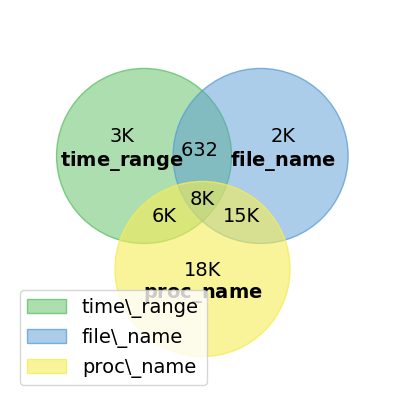

time: 588 ms (started: 2023-12-17 23:45:27 -08:00)


In [8]:
result.plots.view_relations3(
    metric='time',
    view_key1=('time_range',),
    view_key2=('file_name',),
    view_key3=('proc_name',),
)

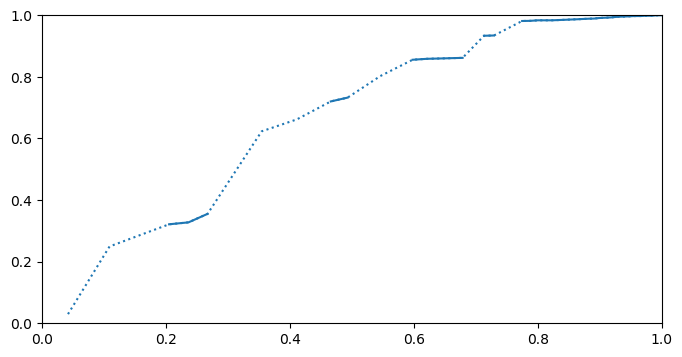

time: 402 ms (started: 2023-12-17 23:45:29 -08:00)


In [9]:
fig, ax = result.plots.slope(
    figsize=(8, 4),
    metric='time',
    view_keys=[('time_range',)],
)